In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import seaborn as sns
import gc
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import GroupKFold, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
# from pandarallel import pandarallel
# pandarallel.initialize()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#显示所有列
pd.set_option('display.max_columns', 100)
#显示所有行
pd.set_option('display.max_rows', 100)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',70)

In [2]:
feature_train=pd.read_pickle("../processed_data/final_feature_train.pkl")
feature_test=pd.read_pickle("../processed_data/final_feature_test.pkl")

In [3]:
feature_train.columns

Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'label', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package',
       'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'day', 'hour', 'minute', 'hw_ratio', 'hw_matrix', 'inch',
       'apptype_count', 'carrier_count', 'dev_ppi_count', 'dev_width_count',
       'lan_count', 'media_id_count', 'ntt_count', 'osv_count',
       'package_count', 'version_count', 'fea_hash_count', 'location_count',
       'fea1_hash_count', 'cus_type_count', 'day_count',
       'day_apptype_group_count', 'day_carrier_group_count',
       'day_dev_ppi_group_count', 'day_dev_width_group_count',
       'day_lan_group_count', 'day_media_id_group_count',
       'day_ntt_group_count', 'day_osv_group_count', 'day_package_group_count',
       'day_version_group_count', 'day_fea_hash_group_count',
       'day_location_group_count', 'day_fea1_hash_group_count',
       'day_cus_type_group_count', 'hour_appt

In [27]:
# for col in ['hw_ratio', 'inch','hw_matrix',"timestamp"]:
#     feature_train[col]=(feature_train[col] - feature_train[col].mean()) / (feature_train[col].std())
#     feature_test[col]=(feature_test[col] - feature_test[col].mean()) / (feature_test[col].std())

In [4]:
feature_test

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,label,day,hour,minute,hw_ratio,hw_matrix,inch,apptype_count,carrier_count,dev_ppi_count,dev_width_count,lan_count,media_id_count,ntt_count,osv_count,package_count,version_count,fea_hash_count,location_count,fea1_hash_count,cus_type_count,day_count,day_apptype_group_count,day_carrier_group_count,day_dev_ppi_group_count,day_dev_width_group_count,day_lan_group_count,day_media_id_group_count,day_ntt_group_count,day_osv_group_count,day_package_group_count,day_version_group_count,day_fea_hash_group_count,day_location_group_count,day_fea1_hash_group_count,day_cus_type_group_count,hour_apptype_group_count,hour_carrier_group_count,hour_dev_ppi_group_count,hour_dev_width_group_count,hour_lan_group_count,hour_media_id_group_count,hour_ntt_group_count,hour_osv_group_count,hour_package_group_count,hour_version_group_count,hour_fea_hash_group_count,hour_location_group_count,hour_fea1_hash_group_count,hour_cus_type_group_count,fea1_hash_ntt_combine,fea_hash_carrier_combine,cus_type_osv_combine,fea1_hash_apptype_combine,fea_hash_media_id_combine,cus_type_version_combine,apptype_ntt_combine,media_id_carrier_combine,version_osv_combine,package_lan_combine
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440682,317625,78,1,2196.0,2.0,1080.0,1.0,125,2,0,113,183.0,1.559872e+12,12.0,0,58,2555,19,None,7,1,43,2.033333,2371680.0,1223.602877,0.000260,0.717940,0.136547,0.420513,0.049267,0.000260,0.63692,0.316960,0.000260,0.056093,0.837080,0.011940,0.000267,0.012793,0.147920,0.000225,0.724941,0.141833,0.405084,0.062601,0.000225,0.663827,0.305886,0.000225,0.049216,0.846133,0.010772,0.000225,0.012394,0.002028,0.712982,0.148073,0.383367,0.046653,0.002028,0.628803,0.310345,0.002028,0.050710,0.835700,0.012170,0.002028,0.019270,2555_2,0_1,19_113,2555_78,0_125,19_12.0,78_2,125_1,12.0_113,183.0_1.0
1606824,435108,41,3,2280.0,3.0,1080.0,7.0,137,6,0,113,210.0,1.559739e+12,7.0,0,24,72,34,None,5,12,53,2.111111,2462400.0,840.951842,0.002247,0.064713,0.171140,0.420513,0.867087,0.000440,0.23250,0.316960,0.000440,0.280113,0.837080,0.017013,0.020047,0.012860,0.147547,0.003434,0.064522,0.146937,0.415597,0.870188,0.000542,0.245165,0.323694,0.000542,0.299747,0.827173,0.017847,0.017125,0.012019,0.004345,0.068791,0.169442,0.394642,0.884142,0.002172,0.219406,0.341057,0.002172,0.262129,0.852281,0.020275,0.053584,0.015930,72_6,0_3,34_113,72_41,0_137,34_7.0,41_6,137_3,7.0_113,210.0_7.0
1774642,0,68,1,1280.0,2.0,810.0,7.0,8,2,1,55,0.0,1.559614e+12,6.0,0,31,2796,6,None,4,2,8,1.580247,1036800.0,757.380354,0.095160,0.717940,0.136547,0.002593,0.867087,0.074260,0.63692,0.038993,0.040213,0.110193,0.837080,0.015013,0.002307,0.268260,0.152000,0.080088,0.700395,0.137149,0.002105,0.880351,0.060877,0.611491,0.035219,0.036009,0.101316,0.827412,0.016535,0.004649,0.271535,0.071222,0.682387,0.154957,0.002887,0.872955,0.056785,0.558229,0.030799,0.037536,0.101059,0.808470,0.015399,0.007700,0.277190,2796_2,0_1,6_55,2796_68,0_8,6_6.0,68_2,8_1,6.0_55,0.0_7.0
1742535,451504,12,1,1344.0,320.0,720.0,7.0,11,2,1,77,10.0,1.559668e+12,13.0,11452,66,2188,29,None,4,17,3,1.866667,967680.0,4.764714,0.080627,0.717940,0.072533,0.125460,0.867087,0.075687,0.63692,0.055313,0.097647,0.156860,0.000013,0.001007,0.006953,0.012827,0.152000,0.081491,0.700395,0.074737,0.118026,0.880351,0.078158,0.611491,0.056667,0.099167,0.149781,0.000088,0.001272,0.006798,0.013070,0.081448,0.642534,0.090498,0.144796,0.904977,0.079186,0.665158,0.067873,0.097285,0.138009,0.002262,0.002262,0.002262,0.027149,2188_2,11452_1,29_77,2188_12,11452_11,29_13.0,12_2,11_1,13.0_77,10.0_7.0
1689686,0,48,1,665.0,1.0,320.0,7.0,6,5,0,113,5.0,1.559694e+12,7.0,0,149,1677,6,None,5,0,16,2.078125,212800.0,737.987127,0.202513,0.717940,0.173293,0.007767,0.867087,0.187920,0.07014,0.316960,0.187920,0.280113,0.837080,0.003533,0.020013,0.268260,0.147547,0.221896,0.720721,0.190222,0.008088,0.8

In [5]:
feature_train

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,day,hour,minute,hw_ratio,hw_matrix,inch,apptype_count,carrier_count,dev_ppi_count,dev_width_count,lan_count,media_id_count,ntt_count,osv_count,package_count,version_count,fea_hash_count,location_count,fea1_hash_count,cus_type_count,day_count,day_apptype_group_count,day_carrier_group_count,day_dev_ppi_group_count,day_dev_width_group_count,day_lan_group_count,day_media_id_group_count,day_ntt_group_count,day_osv_group_count,day_package_group_count,day_version_group_count,day_fea_hash_group_count,day_location_group_count,day_fea1_hash_group_count,day_cus_type_group_count,hour_apptype_group_count,hour_carrier_group_count,hour_dev_ppi_group_count,hour_dev_width_group_count,hour_lan_group_count,hour_media_id_group_count,hour_ntt_group_count,hour_osv_group_count,hour_package_group_count,hour_version_group_count,hour_fea_hash_group_count,hour_location_group_count,hour_fea1_hash_group_count,hour_cus_type_group_count,fea1_hash_ntt_combine,fea_hash_carrier_combine,cus_type_osv_combine,fea1_hash_apptype_combine,fea_hash_media_id_combine,cus_type_version_combine,apptype_ntt_combine,media_id_carrier_combine,version_osv_combine,package_lan_combine
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1438873,316361,81,1,1098.0,480.0,912.0,1,1.0,21,6,1,114,19.0,1.559893e+12,13.0,0,1,1503,16,7,7,32,1.203947,1001376.0,2.973660,0.154747,2.396060,1.335540,0.086527,0.166113,0.148780,0.776987,0.522780,0.149180,0.519420,2.557173,0.077647,0.166460,0.043040,0.494340,0.058421,0.723942,0.408734,0.031921,0.062238,0.056614,0.220874,0.157867,0.056763,0.161684,0.780718,0.022360,0.062696,0.012704,0.067503,0.726725,0.405521,0.039398,0.072020,0.065747,0.231368,0.149561,0.065747,0.167629,0.776662,0.019322,0.072773,0.011041,1503_6,0_1,16_114,1503_81,0_21,16_13.0,81_6,21_1,13.0_114,19.0_1.0
1185582,135939,31,0,721.0,480.0,1233.0,1,7.0,4,6,1,112,3.0,1.559994e+12,8.0,0,2,1852,37,8,11,40,0.584753,888993.0,2.975690,0.181033,0.271013,1.335540,0.045567,2.888920,0.058860,0.776987,0.128673,0.104700,0.330473,2.557173,0.036847,0.013360,0.043200,0.502033,0.048363,0.084496,0.400584,0.012602,0.862346,0.015935,0.213107,0.035018,0.029971,0.086488,0.785858,0.010796,0.003731,0.013186,0.049222,0.084417,0.405509,0.015557,0.838052,0.016832,0.234889,0.040041,0.029329,0.082887,0.776588,0.011732,0.004336,0.013262,1852_6,0_0,37_112,1852_31,0_4,37_8.0,31_6,4_0,8.0_112,3.0_7.0
1555716,399254,22,0,760.0,140.0,360.0,1,7.0,111,0,1,113,8.0,1.559837e+12,2.0,10594,3,406,21,6,15,58,2.111111,273600.0,6.006799,0.010027,0.271013,0.000747,0.514180,2.888920,0.001893,0.137447,1.063080,0.041773,0.242340,0.000033,0.010240,0.001893,0.043060,0.504867,0.002483,0.087271,0.000119,0.156675,0.860108,0.000317,0.038241,0.316823,0.011884,0.072125,0.000026,0.003446,0.000317,0.013509,0.001318,0.089902,0.000264,0.104930,0.836805,0.000264,0.031374,0.309518,0.007118,0.074347,0.000264,0.003691,0.000264,0.015819,406_0,10594_0,21_113,406_22,10594_111,21_2.0,22_0,111_0,2.0_113,8.0_7.0
1093419,68983,49,1,2214.0,480.0,1080.0,0,7.0,26,2,1,113,25.0,1.560042e+12,9.0,0,4,846,24,9,0,59,2.050000,2391120.0,5.132023,0.111473,2.396060,1.335540,1.399593,2.888920,0.013873,2.123980,1.063080,0.105513,0.586367,2.557173,0.009720,0.000800,0.042753,0.411213,0.027934,0.719432,0.381311,0.410055,0.870529,0.002902,0.653546,0.320288,0.026945,0.175221,0.784783,0.003145,0.000259,0.013067,0.033597,0.738193,0.352773,0.400951,0.890650,0.003803,0.661807,0.325198,0.032330,0.163867,0.793661,0.004120,0.000317,0.010777,846_2,0_1,24_113,846_49,0_26,24_9.0,49_2,26_1,9.0_113,25.0_7.0
1400089,288999,62,1,2280.0,480.0,1080.0,1,7.0,13,2,1,109,6.0,1.559867e+12,9.0,0,5,985,15,7,0,28,2.111111,2462400.0,5.255949,0.267887,2.396060,1.335540,1.399593,2.888920,0.267833,2.123980,0.108080,0.322000,0.586367,2.557173,0.037320,0.044533,0.043227,0.494340,0.077491,0.723942,0.408734,0.401357,0.852949,0.

## classify

In [6]:
cate_feature = ['apptype', 'carrier', 'media_id', 'osv', 'package', 'version', 'location', 'cus_type',"fea1_hash","fea_hash","ntt","os",'fea1_hash_ntt_combine','fea_hash_carrier_combine', 'cus_type_osv_combine','fea1_hash_apptype_combine','fea_hash_media_id_combine','cus_type_version_combine', 'apptype_ntt_combine','media_id_carrier_combine', 'version_osv_combine','package_lan_combine']

# x_col=df_importance.head(27).column

y_col = 'label'
x_col=['apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package',
       'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'day', 'hour', 'minute', 'hw_ratio', 'hw_matrix', 'inch','apptype_count', 'carrier_count', 'dev_ppi_count', 'dev_width_count',
       'lan_count', 'media_id_count', 'ntt_count', 'osv_count',
       'package_count', 'version_count', 'fea_hash_count', 'location_count',
       'fea1_hash_count', 'cus_type_count', 'day_count',
       'day_apptype_group_count', 'day_carrier_group_count',
       'day_dev_ppi_group_count', 'day_dev_width_group_count',
       'day_lan_group_count', 'day_media_id_group_count',
       'day_ntt_group_count', 'day_osv_group_count', 'day_package_group_count',
       'day_version_group_count', 'day_fea_hash_group_count',
       'day_location_group_count', 'day_fea1_hash_group_count',
       'day_cus_type_group_count', 'hour_apptype_group_count',
       'hour_carrier_group_count', 'hour_dev_ppi_group_count',
       'hour_dev_width_group_count', 'hour_lan_group_count',
       'hour_media_id_group_count', 'hour_ntt_group_count',
       'hour_osv_group_count', 'hour_package_group_count',
       'hour_version_group_count', 'hour_fea_hash_group_count',
       'hour_location_group_count', 'hour_fea1_hash_group_count',
       'hour_cus_type_group_count', 'fea1_hash_ntt_combine',
       'fea_hash_carrier_combine', 'cus_type_osv_combine',
       'fea1_hash_apptype_combine', 'fea_hash_media_id_combine',
       'cus_type_version_combine', 'apptype_ntt_combine',
       'media_id_carrier_combine', 'version_osv_combine',
       'package_lan_combine']
cate_feature = [x for x in cate_feature if x in x_col]
for item in cate_feature:
#     print(item)
    if item in ['fea1_hash_ntt_combine','fea_hash_carrier_combine', 'cus_type_osv_combine','fea1_hash_apptype_combine', 'fea_hash_media_id_combine','cus_type_version_combine', 'apptype_ntt_combine','media_id_carrier_combine', 'version_osv_combine','package_lan_combine']:
        set4=set(feature_train[item].value_counts().head(300).index)
        def process_fea_hash(x):
            if x in set4:return x
            else:return -1
        feature_train[item]=feature_train[item].apply(process_fea_hash).astype("str")
        feature_test[item]=feature_test[item].apply(process_fea_hash).astype("str")
    le=preprocessing.LabelEncoder()
    feature_train[item] = le.fit_transform(feature_train[item])
    feature_test[item] = le.transform(feature_test[item])

prediction = feature_test[x_col]
prediction['label'] = 0

In [8]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.5, importance_type='split',
               learning_rate=0.025, max_depth=7, metric=None,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=128, objective=None,
               random_state=220, reg_alpha=0.3, reg_lambda=0.3, save_binary=True,
               silent=True, subsample=0.8, subsample_for_bin=200000,
               subsample_freq=0)

oof = []
df_importance_list = []
n=10
# kfold = GroupKFold(n_splits=n)
kfold = KFold(n_splits=n,shuffle=True,random_state=220)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(feature_train[x_col], feature_train[y_col])):
    # if fold_id!=1:
    #     continue
    X_train = feature_train.iloc[trn_idx][x_col]
    Y_train = feature_train.iloc[trn_idx][y_col]

    X_val = feature_train.iloc[val_idx][x_col]
    Y_val = feature_train.iloc[val_idx][y_col]

    print('\nFold_{} Training ================================\n'.format(fold_id+1))

    lgb_model = model.fit(
        X_train,
        Y_train,
        categorical_feature=cate_feature,
        eval_names=['train', 'valid'],
        eval_set=[(X_train, Y_train), (X_val, Y_val)],
        verbose=100,
        eval_metric=["auc","binary_logloss","binary_error"],
        early_stopping_rounds=400
    )

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof = feature_train.iloc[val_idx].copy()
    df_oof['pred'] = pred_val
    oof.append(df_oof)

    pred_test = lgb_model.predict_proba(feature_test[x_col], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction['label'] += pred_test / n


    df_importance = pd.DataFrame({
        'column': x_col,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)


Fold_1 Training ================================

Training until validation scores don't improve for 400 rounds


KeyboardInterrupt: 

0                       location
1       cus_type_version_combine
2                       hw_ratio
3           cus_type_osv_combine
4            version_osv_combine
5                       cus_type
6                      fea1_hash
7           hour_osv_group_count
8       media_id_carrier_combine
9                      hw_matrix
10     hour_location_group_count
11                    dev_height
12     hour_cus_type_group_count
13                        minute
14         fea1_hash_ntt_combine
15      hour_carrier_group_count
16    hour_dev_width_group_count
17          hour_lan_group_count
18     hour_fea_hash_group_count
19      day_cus_type_group_count
20                     timestamp
21          hour_ntt_group_count
22      day_location_group_count
23    hour_fea1_hash_group_count
24      hour_dev_ppi_group_count
25                          inch
26      hour_version_group_count
Name: column, dtype: object

In [8]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance

,column,importance
0,location,3522.2
1,cus_type_version_combine,2788.8
2,hw_ratio,2680.2
3,cus_type_osv_combine,2049.0
4,version_osv_combine,1961.0
5,cus_type,1906.6
6,fea1_hash,1877.4
7,hour_osv_group_count,1515.2
8,media_id_carrier_combine,1505.2
9,hw_matrix,1405.8


## catboost classify

In [7]:
from catboost import CatBoostClassifier

In [8]:
model2 =CatBoostClassifier(loss_function="Logloss",
                           eval_metric="Accuracy",
                           task_type="GPU",
                           learning_rate=0.03,
                           iterations=10000,
                           random_seed=42,
                           od_type="Iter",
                           metric_period=10,
                           depth=10,
                           early_stopping_rounds=500,
                           use_best_model=True,
                           bagging_temperature=0.8,
                           leaf_estimation_method="Newton",
                          )

oof = []
df_importance_list = []
n=5
# kfold = GroupKFold(n_splits=n)
kfold = KFold(n_splits=n,shuffle=True,random_state=220)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(feature_train[x_col], feature_train[y_col])):
    # if fold_id!=0:
    #     continue
    X_train = feature_train.iloc[trn_idx][x_col]
    Y_train = feature_train.iloc[trn_idx][y_col]

    X_val = feature_train.iloc[val_idx][x_col]
    Y_val = feature_train.iloc[val_idx][y_col]

    print('\nFold_{} Training ================================\n'.format(fold_id+1))
    cat_model=model2.fit( 
        X_train,
        Y_train,
        cat_features=cate_feature,
        # # eval_names=['train', 'valid'],
        eval_set= (X_val, Y_val),
        verbose=100,
        
        # plot=True
        # # eval_metric=["auc","binary_logloss","binary_error"],
        # early_stopping_rounds=400
    )

    pred_val = cat_model.predict_proba(X_val, thread_count=-1)[:, 1]
    df_oof = feature_train.iloc[val_idx].copy()
    df_oof['pred'] = pred_val
    oof.append(df_oof)

    pred_test = cat_model.predict_proba(feature_test[x_col], thread_count=-1)[:, 1]
    prediction['label'] += pred_test / n
    # prediction['label'] += pred_test

    df_importance = pd.DataFrame({
        'column': x_col,
        'importance': cat_model.feature_importances_,
    })
    df_importance_list.append(df_importance)



Fold_1 Training ================================



CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/options/catboost_options.cpp:505: Error: rsm on GPU is supported for pairwise modes only

<BarContainer object of 76 artists>

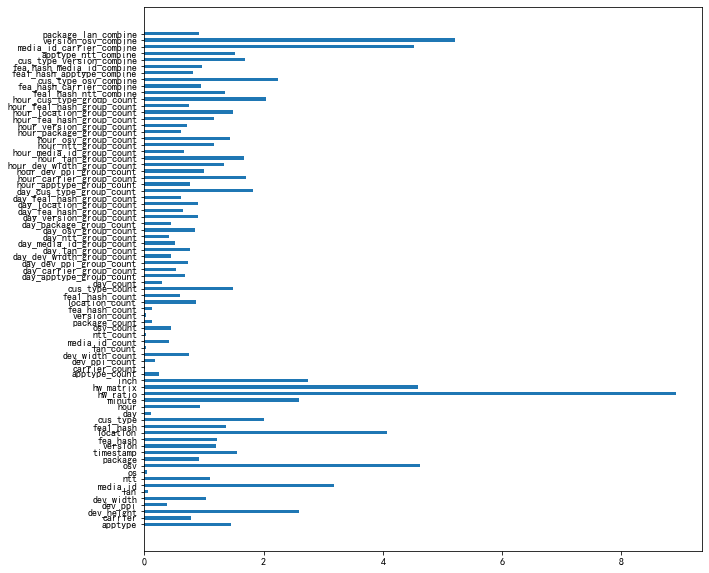

In [34]:
import matplotlib.pyplot as plt 
fea_ = cat_model.feature_importances_
fea_name = cat_model.feature_names_
plt.figure(figsize=(10, 10))
plt.barh(fea_name,fea_,height =1);

In [35]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance

,column,importance
0,hw_ratio,10.210275
1,version_osv_combine,5.764968
2,hw_matrix,5.145768
3,media_id_carrier_combine,5.013738
4,osv,4.907098
5,location,3.892643
6,media_id,3.594572
7,inch,2.684774
8,dev_height,2.550663
9,cus_type_osv_combine,2.147134


### LR

In [14]:
# df_oof=pd.concat(oof)
# df_oof["label_prior"]=feature_train.label.values
# df.pred=df.pred.apply(lambda x:1 if x>threshold else 0)
# df["acc"]=(df_oof.pred==df_oof.label_prior).values
# print(sum(df["acc"]/500000))

In [37]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
df_oof['label_prior'] =  feature_train.label.values
X_train, X_test, y_train, y_test = train_test_split(df_oof[['apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package',
       'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'day', 'hour', 'minute', 'hw_ratio', 'hw_matrix', 'inch',
       'apptype_count', 'carrier_count', 'dev_ppi_count', 'dev_width_count',
       'lan_count', 'media_id_count', 'ntt_count', 'osv_count',
       'package_count', 'version_count', 'fea_hash_count', 'location_count',
       'fea1_hash_count', 'cus_type_count', 'day_count',
       'day_apptype_group_count', 'day_carrier_group_count',
       'day_dev_ppi_group_count', 'day_dev_width_group_count',
       'day_lan_group_count', 'day_media_id_group_count',
       'day_ntt_group_count', 'day_osv_group_count', 'day_package_group_count',
       'day_version_group_count', 'day_fea_hash_group_count',
       'day_location_group_count', 'day_fea1_hash_group_count',
       'day_cus_type_group_count', 'hour_apptype_group_count',
       'hour_carrier_group_count', 'hour_dev_ppi_group_count',
       'hour_dev_width_group_count', 'hour_lan_group_count',
       'hour_media_id_group_count', 'hour_ntt_group_count',
       'hour_osv_group_count', 'hour_package_group_count',
       'hour_version_group_count', 'hour_fea_hash_group_count',
       'hour_location_group_count', 'hour_fea1_hash_group_count',
       'hour_cus_type_group_count', 'fea1_hash_ntt_combine',
       'fea_hash_carrier_combine', 'cus_type_osv_combine',
       'fea1_hash_apptype_combine', 'fea_hash_media_id_combine',
       'cus_type_version_combine', 'apptype_ntt_combine',
       'media_id_carrier_combine', 'version_osv_combine',
       'package_lan_combine',"label"]].fillna(0),df_oof[["label_prior"]],train_size=0.8, random_state=6)

# lr = SVC(max_iter=400,C=2,kernel='rbf',tol=0.001)
# lr =LogisticRegression(C=2,random_state=2)
lr = RandomForestClassifier(n_estimators=100,max_depth=40, random_state=0,n_jobs=-1,oob_score=True)
# Fit on the train data
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)
print("The prediction score on the test data is {:.2f}%".format(score*100))

The prediction score on the test data is 50.41%


In [36]:
prediction[x_col]

,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,day,hour,minute,hw_ratio,hw_matrix,inch,apptype_count,carrier_count,dev_ppi_count,dev_width_count,lan_count,media_id_count,ntt_count,osv_count,package_count,version_count,fea_hash_count,location_count,fea1_hash_count,cus_type_count,day_count,day_apptype_group_count,day_carrier_group_count,day_dev_ppi_group_count,day_dev_width_group_count,day_lan_group_count,day_media_id_group_count,day_ntt_group_count,day_osv_group_count,day_package_group_count,day_version_group_count,day_fea_hash_group_count,day_location_group_count,day_fea1_hash_group_count,day_cus_type_group_count,hour_apptype_group_count,hour_carrier_group_count,hour_dev_ppi_group_count,hour_dev_width_group_count,hour_lan_group_count,hour_media_id_group_count,hour_ntt_group_count,hour_osv_group_count,hour_package_group_count,hour_version_group_count,hour_fea_hash_group_count,hour_location_group_count,hour_fea1_hash_group_count,hour_cus_type_group_count,fea1_hash_ntt_combine,fea_hash_carrier_combine,cus_type_osv_combine,fea1_hash_apptype_combine,fea_hash_media_id_combine,cus_type_version_combine,apptype_ntt_combine,media_id_carrier_combine,version_osv_combine,package_lan_combine
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440682,78,2,2196.0,2.0,1080.0,1.0,125,2,0,113,182,1.559872e+12,11,0,58,2555,19,7,1,43,2.033333,2371680.0,1223.602877,0.000260,0.717940,0.136547,0.420513,0.049267,0.000260,0.63692,0.316960,0.000260,0.056093,0.837080,0.011940,0.000267,0.012793,0.147920,0.000225,0.724941,0.141833,0.405084,0.062601,0.000225,0.663827,0.305886,0.000225,0.049216,0.846133,0.010772,0.000225,0.012394,0.002028,0.712982,0.148073,0.383367,0.046653,0.002028,0.628803,0.310345,0.002028,0.050710,0.835700,0.012170,0.002028,0.019270,1,224,248,1,226,1,173,238,158,273
1606824,41,4,2280.0,3.0,1080.0,7.0,137,6,0,113,209,1.559739e+12,6,0,24,72,34,5,12,53,2.111111,2462400.0,840.951842,0.002247,0.064713,0.171140,0.420513,0.867087,0.000440,0.23250,0.316960,0.000440,0.280113,0.837080,0.017013,0.020047,0.012860,0.147547,0.003434,0.064522,0.146937,0.415597,0.870188,0.000542,0.245165,0.323694,0.000542,0.299747,0.827173,0.017847,0.017125,0.012019,0.004345,0.068791,0.169442,0.394642,0.884142,0.002172,0.219406,0.341057,0.002172,0.262129,0.852281,0.020275,0.053584,0.015930,194,247,41,1,239,49,39,1,105,297
1774642,68,2,1280.0,2.0,810.0,7.0,8,2,1,55,0,1.559614e+12,5,0,31,2796,6,4,2,8,1.580247,1036800.0,757.380354,0.095160,0.717940,0.136547,0.002593,0.867087,0.074260,0.63692,0.038993,0.040213,0.110193,0.837080,0.015013,0.002307,0.268260,0.152000,0.080088,0.700395,0.137149,0.002105,0.880351,0.060877,0.611491,0.035219,0.036009,0.101316,0.827412,0.016535,0.004649,0.271535,0.071222,0.682387,0.154957,0.002887,0.872955,0.056785,0.558229,0.030799,0.037536,0.101059,0.808470,0.015399,0.007700,0.277190,111,224,198,115,89,204,142,204,88,2
1742535,12,2,1344.0,320.0,720.0,7.0,11,2,1,77,9,1.559668e+12,12,11452,66,2188,29,4,17,3,1.866667,967680.0,4.764714,0.080627,0.717940,0.072533,0.125460,0.867087,0.075687,0.63692,0.055313,0.097647,0.156860,0.000013,0.001007,0.006953,0.012827,0.152000,0.081491,0.700395,0.074737,0.118026,0.880351,0.078158,0.611491,0.056667,0.099167,0.149781,0.000088,0.001272,0.006798,0.013070,0.081448,0.642534,0.090498,0.144796,0.904977,0.079186,0.665158,0.067873,0.097285,0.138009,0.002262,0.002262,0.002262,0.027149,63,1,12,57,1,12,36,229,265,112
1689686,48,2,665.0,1.0,320.0,7.0,6,5,0,113,4,1.559694e+12,6,0,149,1677,6,5,0,16,2.078125,212800.0,737.987127,0.202513,0.717940,0.173293,0.007767,0.867087,0.187920,0.07014,0.316960,0.187920,0.280113,0.837080,0.003533,0.020013,0.268260,0.147547,0.221896,0.720721,0.190222,0.008088,0.870188,0.205042,0.076315,0.323694,0.205042,0.299747,0.827173,0.003524,0.021417,0.273450,0.294427,0.703470,0.242902,0.011567,0.878023,0.266036,0.100946,0.304942,0.266036,0.338591,0.791798,0.007361,0.028391,0.315457,10,224,1

In [37]:
feature_test[x_col]

,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,day,hour,minute,hw_ratio,hw_matrix,inch,apptype_count,carrier_count,dev_ppi_count,dev_width_count,lan_count,media_id_count,ntt_count,osv_count,package_count,version_count,fea_hash_count,location_count,fea1_hash_count,cus_type_count,day_count,day_apptype_group_count,day_carrier_group_count,day_dev_ppi_group_count,day_dev_width_group_count,day_lan_group_count,day_media_id_group_count,day_ntt_group_count,day_osv_group_count,day_package_group_count,day_version_group_count,day_fea_hash_group_count,day_location_group_count,day_fea1_hash_group_count,day_cus_type_group_count,hour_apptype_group_count,hour_carrier_group_count,hour_dev_ppi_group_count,hour_dev_width_group_count,hour_lan_group_count,hour_media_id_group_count,hour_ntt_group_count,hour_osv_group_count,hour_package_group_count,hour_version_group_count,hour_fea_hash_group_count,hour_location_group_count,hour_fea1_hash_group_count,hour_cus_type_group_count,fea1_hash_ntt_combine,fea_hash_carrier_combine,cus_type_osv_combine,fea1_hash_apptype_combine,fea_hash_media_id_combine,cus_type_version_combine,apptype_ntt_combine,media_id_carrier_combine,version_osv_combine,package_lan_combine
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440682,78,2,2196.0,2.0,1080.0,1.0,125,2,0,113,182,1.559872e+12,11,0,58,2555,19,7,1,43,2.033333,2371680.0,1223.602877,0.000260,0.717940,0.136547,0.420513,0.049267,0.000260,0.63692,0.316960,0.000260,0.056093,0.837080,0.011940,0.000267,0.012793,0.147920,0.000225,0.724941,0.141833,0.405084,0.062601,0.000225,0.663827,0.305886,0.000225,0.049216,0.846133,0.010772,0.000225,0.012394,0.002028,0.712982,0.148073,0.383367,0.046653,0.002028,0.628803,0.310345,0.002028,0.050710,0.835700,0.012170,0.002028,0.019270,1,224,248,1,226,1,173,238,158,273
1606824,41,4,2280.0,3.0,1080.0,7.0,137,6,0,113,209,1.559739e+12,6,0,24,72,34,5,12,53,2.111111,2462400.0,840.951842,0.002247,0.064713,0.171140,0.420513,0.867087,0.000440,0.23250,0.316960,0.000440,0.280113,0.837080,0.017013,0.020047,0.012860,0.147547,0.003434,0.064522,0.146937,0.415597,0.870188,0.000542,0.245165,0.323694,0.000542,0.299747,0.827173,0.017847,0.017125,0.012019,0.004345,0.068791,0.169442,0.394642,0.884142,0.002172,0.219406,0.341057,0.002172,0.262129,0.852281,0.020275,0.053584,0.015930,194,247,41,1,239,49,39,1,105,297
1774642,68,2,1280.0,2.0,810.0,7.0,8,2,1,55,0,1.559614e+12,5,0,31,2796,6,4,2,8,1.580247,1036800.0,757.380354,0.095160,0.717940,0.136547,0.002593,0.867087,0.074260,0.63692,0.038993,0.040213,0.110193,0.837080,0.015013,0.002307,0.268260,0.152000,0.080088,0.700395,0.137149,0.002105,0.880351,0.060877,0.611491,0.035219,0.036009,0.101316,0.827412,0.016535,0.004649,0.271535,0.071222,0.682387,0.154957,0.002887,0.872955,0.056785,0.558229,0.030799,0.037536,0.101059,0.808470,0.015399,0.007700,0.277190,111,224,198,115,89,204,142,204,88,2
1742535,12,2,1344.0,320.0,720.0,7.0,11,2,1,77,9,1.559668e+12,12,11452,66,2188,29,4,17,3,1.866667,967680.0,4.764714,0.080627,0.717940,0.072533,0.125460,0.867087,0.075687,0.63692,0.055313,0.097647,0.156860,0.000013,0.001007,0.006953,0.012827,0.152000,0.081491,0.700395,0.074737,0.118026,0.880351,0.078158,0.611491,0.056667,0.099167,0.149781,0.000088,0.001272,0.006798,0.013070,0.081448,0.642534,0.090498,0.144796,0.904977,0.079186,0.665158,0.067873,0.097285,0.138009,0.002262,0.002262,0.002262,0.027149,63,1,12,57,1,12,36,229,265,112
1689686,48,2,665.0,1.0,320.0,7.0,6,5,0,113,4,1.559694e+12,6,0,149,1677,6,5,0,16,2.078125,212800.0,737.987127,0.202513,0.717940,0.173293,0.007767,0.867087,0.187920,0.07014,0.316960,0.187920,0.280113,0.837080,0.003533,0.020013,0.268260,0.147547,0.221896,0.720721,0.190222,0.008088,0.870188,0.205042,0.076315,0.323694,0.205042,0.299747,0.827173,0.003524,0.021417,0.273450,0.294427,0.703470,0.242902,0.011567,0.878023,0.266036,0.100946,0.304942,0.266036,0.338591,0.791798,0.007361,0.028391,0.315457,10,224,1

In [38]:
feature_train[x_col]

,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,day,hour,minute,hw_ratio,hw_matrix,inch,apptype_count,carrier_count,dev_ppi_count,dev_width_count,lan_count,media_id_count,ntt_count,osv_count,package_count,version_count,fea_hash_count,location_count,fea1_hash_count,cus_type_count,day_count,day_apptype_group_count,day_carrier_group_count,day_dev_ppi_group_count,day_dev_width_group_count,day_lan_group_count,day_media_id_group_count,day_ntt_group_count,day_osv_group_count,day_package_group_count,day_version_group_count,day_fea_hash_group_count,day_location_group_count,day_fea1_hash_group_count,day_cus_type_group_count,hour_apptype_group_count,hour_carrier_group_count,hour_dev_ppi_group_count,hour_dev_width_group_count,hour_lan_group_count,hour_media_id_group_count,hour_ntt_group_count,hour_osv_group_count,hour_package_group_count,hour_version_group_count,hour_fea_hash_group_count,hour_location_group_count,hour_fea1_hash_group_count,hour_cus_type_group_count,fea1_hash_ntt_combine,fea_hash_carrier_combine,cus_type_osv_combine,fea1_hash_apptype_combine,fea_hash_media_id_combine,cus_type_version_combine,apptype_ntt_combine,media_id_carrier_combine,version_osv_combine,package_lan_combine
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1438873,81,2,1098.0,480.0,912.0,1.0,21,6,1,114,18,1.559893e+12,12,0,1,1503,16,7,7,32,1.203947,1001376.0,2.973660,0.154747,2.396060,1.335540,0.086527,0.166113,0.148780,0.776987,0.522780,0.149180,0.519420,2.557173,0.077647,0.166460,0.043040,0.494340,0.058421,0.723942,0.408734,0.031921,0.062238,0.056614,0.220874,0.157867,0.056763,0.161684,0.780718,0.022360,0.062696,0.012704,0.067503,0.726725,0.405521,0.039398,0.072020,0.065747,0.231368,0.149561,0.065747,0.167629,0.776662,0.019322,0.072773,0.011041,287,224,232,285,19,232,192,13,242,276
1185582,31,1,721.0,480.0,1233.0,7.0,4,6,1,112,2,1.559994e+12,7,0,2,1852,37,8,11,40,0.584753,888993.0,2.975690,0.181033,0.271013,1.335540,0.045567,2.888920,0.058860,0.776987,0.128673,0.104700,0.330473,2.557173,0.036847,0.013360,0.043200,0.502033,0.048363,0.084496,0.400584,0.012602,0.862346,0.015935,0.213107,0.035018,0.029971,0.086488,0.785858,0.010796,0.003731,0.013186,0.049222,0.084417,0.405509,0.015557,0.838052,0.016832,0.234889,0.040041,0.029329,0.082887,0.776588,0.011732,0.004336,0.013262,40,113,56,27,41,68,293,99,148,69
1555716,22,1,760.0,140.0,360.0,7.0,111,0,1,113,7,1.559837e+12,1,10594,3,406,21,6,15,58,2.111111,273600.0,6.006799,0.010027,0.271013,0.000747,0.514180,2.888920,0.001893,0.137447,1.063080,0.041773,0.242340,0.000033,0.010240,0.001893,0.043060,0.504867,0.002483,0.087271,0.000119,0.156675,0.860108,0.000317,0.038241,0.316823,0.011884,0.072125,0.000026,0.003446,0.000317,0.013509,0.001318,0.089902,0.000264,0.104930,0.836805,0.000264,0.031374,0.309518,0.007118,0.074347,0.000264,0.003691,0.000264,0.015819,1,1,263,149,1,267,253,135,8,202
1093419,49,2,2214.0,480.0,1080.0,7.0,26,2,1,113,24,1.560042e+12,8,0,4,846,24,9,0,59,2.050000,2391120.0,5.132023,0.111473,2.396060,1.335540,1.399593,2.888920,0.013873,2.123980,1.063080,0.105513,0.586367,2.557173,0.009720,0.000800,0.042753,0.411213,0.027934,0.719432,0.381311,0.410055,0.870529,0.002902,0.653546,0.320288,0.026945,0.175221,0.784783,0.003145,0.000259,0.013067,0.033597,0.738193,0.352773,0.400951,0.890650,0.003803,0.661807,0.325198,0.032330,0.163867,0.793661,0.004120,0.000317,0.010777,1,224,280,1,24,287,67,30,204,39
1400089,62,2,2280.0,480.0,1080.0,7.0,13,2,1,109,5,1.559867e+12,8,0,5,985,15,7,0,28,2.111111,2462400.0,5.255949,0.267887,2.396060,1.335540,1.399593,2.888920,0.267833,2.123980,0.108080,0.322000,0.586367,2.557173,0.037320,0.044533,0.043227,0.494340,0.077491,0.723942,0.408734,0.401357,0.852949,0.077491,0.659708,0.029561,0.092204,0.190247,0.780718,0.010964,0.012475,0.013513,0.070280,0.728333,0.376300,0.398046,0.886858,0.070280,0.667192,0.033722,0.088875,0.163883,0.792310,0.012606,0.011346,0.015443,220,224

In [15]:
a = pd.DataFrame(prediction.index)
a['label'] = cat_model.predict(prediction[x_col])

In [39]:
a = pd.DataFrame(prediction.index)
a['label'] =prediction["label"].values
threshold=0.5
a.label=a.label.apply(lambda x:1 if x>threshold else 0)

In [40]:
a

,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


In [41]:
a.to_csv('submission_0618_0711.csv', index=False)

In [42]:
user_label=pd.DataFrame()
# user_label["uid"]=feature_train.groupby("android_id").count().index
# user_label=user_label.set_index("uid")
user_label["uid"]=feature_train.android_id.values
user_label["ntt"]=feature_train.ntt.values
temp=pd.DataFrame(feature_train.groupby(["android_id","ntt"]).label.mean())
temp=temp.reset_index()
temp.rename(columns={"android_id":"uid","label":"label_prior"},inplace=True)
# user_label["label_prior"]=feature_train.groupby(["android_id","ntt"]).label.transform("mean")

In [43]:
user_label=pd.merge(user_label,temp,on=["uid","ntt"],how="left")
user_label.drop_duplicates(inplace=True)

In [44]:
a["uid"]=feature_test.android_id.values
a["ntt"]=feature_test.ntt.values
a=pd.merge(a,user_label,how="left",on=["uid","ntt"])

In [45]:
def post(label,prior):
    n=len(label)
    count=0
    for i in range(n):
        if 0<=prior[i]<=0.1 and label[i]==1:
            label[i]=0
            count+=1
            # print(i)
        elif 0.9<=prior[i]<=1 and label[i]==0:
            label[i]=1
            count+=1
            # print(i)
        else:
            pass
    print(count)
    return label.values

In [46]:
a.label=post(a.label,a.label_prior)

344


In [47]:
a=a[["sid","label"]]
a.to_csv('submission_0618_0712.csv', index=False)

In [22]:
exit()